In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import ADF, PhillipsPerron, KPSS
import pymannkendall as mk

1. If a time series has directly stationary we are called it as seviyede durağan

2. If a time series has unit root(non-stationary) and we can convert it stationary by taking distance or gap or lag between the two time periods 
and we know it is a stochastic trend and we are called it difference stationary series(fark durağan)
3. If there is a deterministic structure in a series instead of stochastic we can not convert it stationary by taking distance or gap or lag between the two time periods and we are called it trend stationary.

In [30]:
b0 = np.random.rand()
b1 = np.random.rand()
t = np.arange(1, 101)

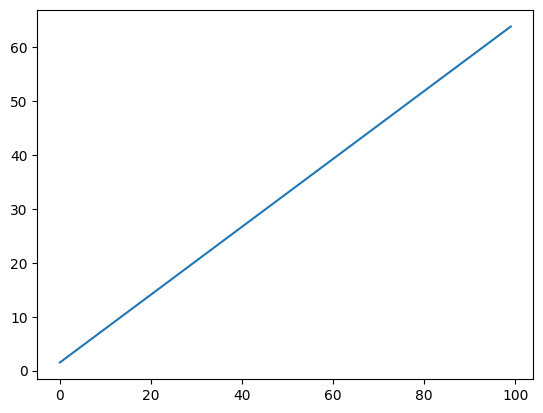

In [31]:
# Now let's create the equation that does not contain residul and observe the graph
y = b0 + b1*t

plt.plot(y)
plt.show()

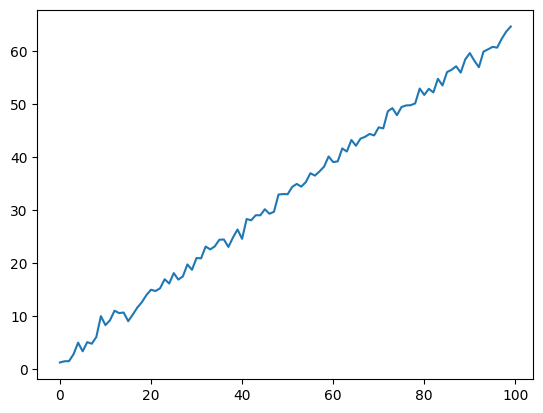

In [32]:
# Now let's create the equation that added residul and observe the graph
e = np.random.normal(loc=0, scale=1, size=100)
y = b0 + b1*t + e

plt.plot(y)
plt.show()

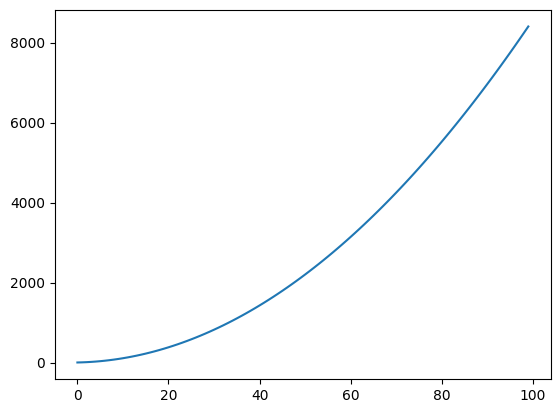

In [33]:
# Now let's create a parabolic series and see the second degree equation graph
b2 = np.random.rand()
y = b0 + b1*t + b2*t**2

plt.plot(y)
plt.show()

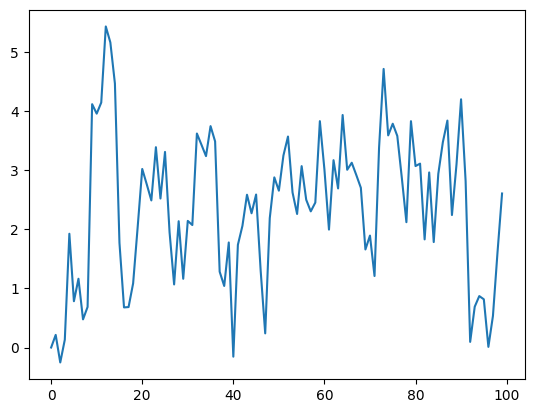

In [34]:
# Now let's take lag values of the series and see how we can convert non stationary series into stationary
y = [0]
for i in range(1, 100):
    yt = b0 + b1*y[i-1] + e[i]
    y.append(yt)

plt.plot(y)
plt.show()

## Deterministic Trend

In [35]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/livestock.csv"
data =pd.read_csv(url, parse_dates=["date"],index_col="date")
data.head()

,value
date,
1961-01-01,232.288994
1962-01-01,229.536258
1963-01-01,233.145936
1964-01-01,243.763684
1965-01-01,252.602916


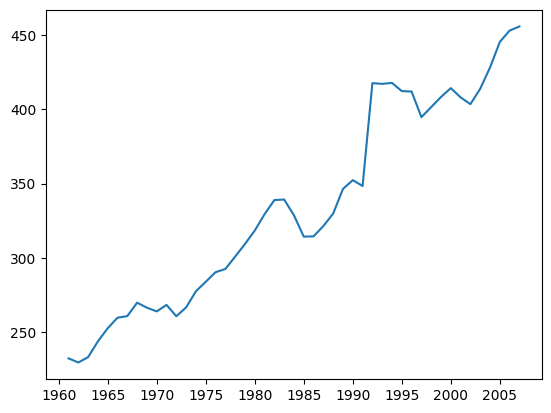

In [36]:
# We can check if there is trend just looking at simply the graph.
plt.plot(data)
plt.show()

In [37]:
# Tp be sure if there is a trend we can check helping of mann-kendall statistical test
mkt = mk.original_test(data)
print(mkt)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.491839889828938, Tau=0.8575393154486587, s=927.0, var_s=11891.0, slope=4.798092125, intercept=218.24451312500003)


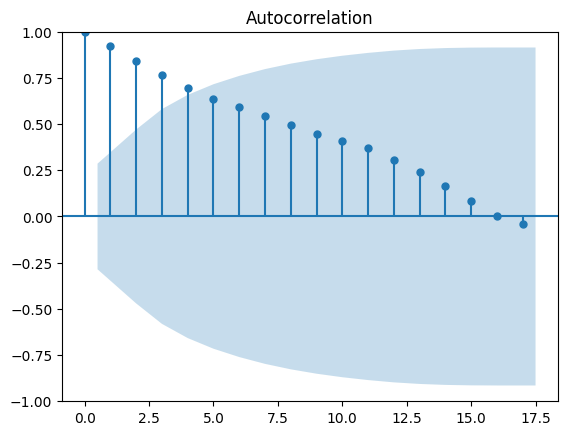

In [38]:
# Looking at autocorrelation structure of time series and as we see below picture we are sure there is a trend in the series.
plot_acf(data)
plt.show()

In [39]:
# Now we need to check if there is a deterministic trend in the data
adf = ADF(data, trend="ct", method="aic")
print(adf)

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.689
P-value                         0.241
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.17 (1%), -3.51 (5%), -3.19 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [40]:
# In above test we can not reject H0 hypothesis so there is unit root and our data is not stationary. We sometimes need to verify that with other test
pp = PhillipsPerron(data, trend="ct")
print(pp)

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.032
P-value                         0.584
Lags                               10
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.17 (1%), -3.51 (5%), -3.19 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [41]:
# Now we will chect if there is stationary with KPSS test. and let's see the series is stationary acording to this test
kpss = KPSS(data, trend="ct")
print(kpss)

    KPSS Stationarity Test Results   
Test Statistic                  0.067
P-value                         0.377
Lags                                3
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
